#  Importing Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import Weather_functions as fp

#  Load Dataset

In [3]:
path = 'dataset'
path_imgs = list(glob.glob(path+'/**/*.jpg'))


In [4]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,dataset\rainbow\0759.jpg,rainbow
1,dataset\rain\1786.jpg,rain
2,dataset\lightning\2097.jpg,lightning
3,dataset\fogsmog\4629.jpg,fogsmog
4,dataset\hail\0369.jpg,hail


In [5]:
data.shape

(6862, 2)

#  EDA & Visualization

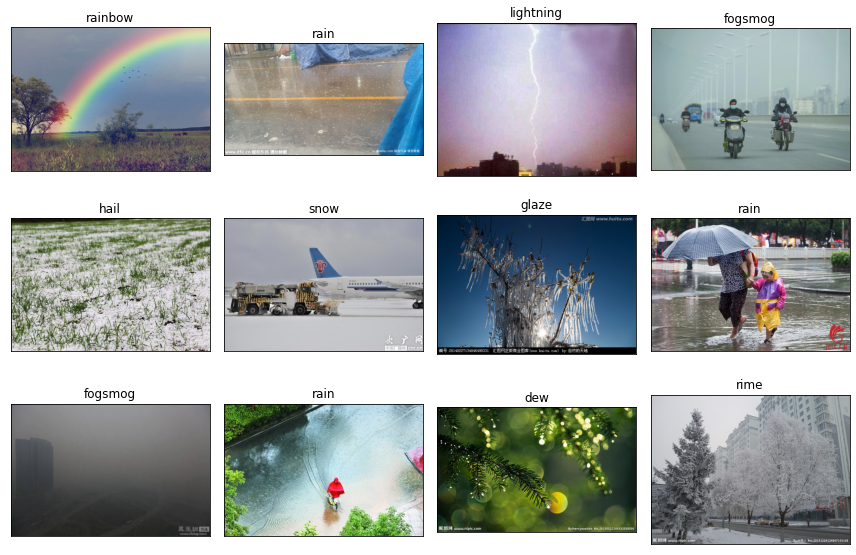

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

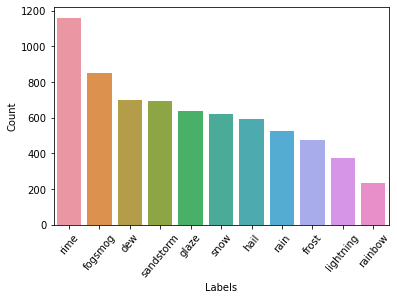

In [7]:
counts = data.Labels.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50);

# Train & Test Split

In [5]:
train_it, test_it = train_test_split(data, test_size=0.2, random_state=2)
testLabels=test_it.Labels
testFilePath=test_it.File_Path

#  Training models

# 1] ResNet50

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/6
69/69 [==============================] - 375s 5s/step - loss: 2.0069 - accuracy: 0.3338 - val_loss: 1.5627 - val_accuracy: 0.5816
Epoch 2/6
69/69 [==============================] - 437s 6s/step - loss: 1.2069 - accuracy: 0.6837 - val_loss: 0.9899 - val_accuracy: 0.7438
Epoch 3/6
69/69 [==============================] - 383s 6s/step - loss: 0.7778 - accuracy: 0.7919 - val_loss: 0.7289 - val_accuracy: 0.7985
Epoch 4/6
69/69 [==============================] - 385s 6s/step - loss: 0.5803 - accuracy: 0.8381 - val_loss: 0.6061 - val_accuracy: 0.8204
Epoch 5/6
69/69 [==============================] - 382s 6s/step - loss: 0.4765 - accuracy: 0.8627 - val_loss: 0.5466 - val_accuracy: 0.8332
Epoch 6/6
69/69 [==============================] - 381s 6s/step - loss: 0.4125 - accuracy: 0.8789 - val_loss: 0.49

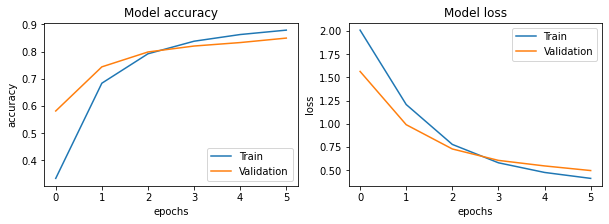

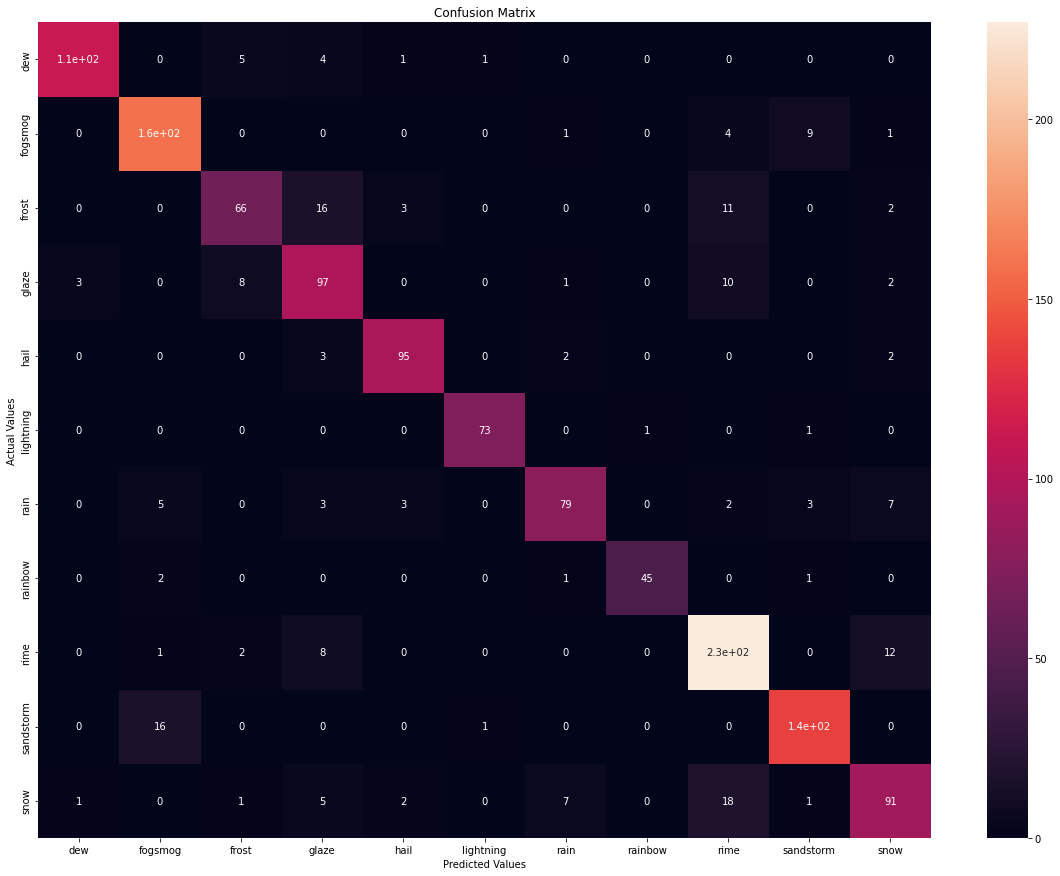

              precision    recall  f1-score   support

         dew       0.97      0.91      0.94       123
     fogsmog       0.87      0.91      0.89       174
       frost       0.80      0.67      0.73        98
       glaze       0.71      0.80      0.75       121
        hail       0.91      0.93      0.92       102
   lightning       0.97      0.97      0.97        75
        rain       0.87      0.77      0.82       102
     rainbow       0.98      0.92      0.95        49
        rime       0.83      0.91      0.87       250
   sandstorm       0.90      0.89      0.89       153
        snow       0.78      0.72      0.75       126

    accuracy                           0.86      1373
   macro avg       0.87      0.86      0.86      1373
weighted avg       0.86      0.86      0.86      1373



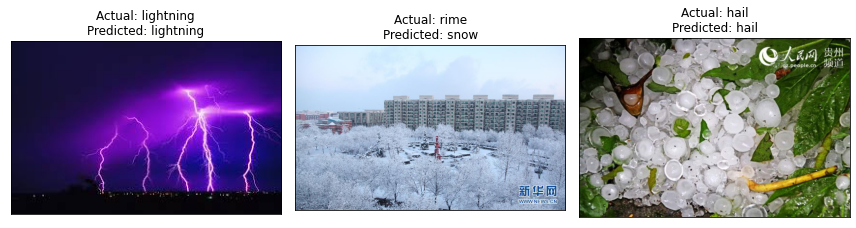

22/22 [==============================] - 97s 4s/step - loss: 0.4578 - accuracy: 0.8594
    Test Loss: 0.45776
Test Accuracy: 85.94%


In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
ResNet_pre_input=preprocess_input
train_gen_ResNet, valid_gen_ResNet, test_gen_ResNet = fp.augment(ResNet_pre_input,train_it,test_it)
ResNet_model, stop_early=fp.run_model(ResNet50)
history = ResNet_model.fit(
    train_gen_ResNet,
    validation_data=valid_gen_ResNet,
    epochs=6,
    callbacks=stop_early
)
history_ResNet= fp.ploting(history,test_gen_ResNet,train_gen_ResNet, ResNet_model,testLabels,testFilePath)

result_ResNet = fp.result_test(test_gen_ResNet,ResNet_model)

In [11]:
ResNet_model.save('model_ResNet_1.h5')

# 2] MobileNet

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 103s 1s/step - loss: 2.3645 - accuracy: 0.2067 - val_loss: 2.0911 - val_accuracy: 0.2981
Epoch 2/10
69/69 [==============================] - 105s 2s/step - loss: 1.8174 - accuracy: 0.4281 - val_loss: 1.6116 - val_accuracy: 0.4959
Epoch 3/10
69/69 [==============================] - 114s 2s/step - loss: 1.3462 - accuracy: 0.6161 - val_loss: 1.1989 - val_accuracy: 0.6545
Epoch 4/10
69/69 [==============================] - 110s 2s/step - loss: 1.0013 - accuracy: 0.7259 - val_loss: 0.9420 - val_accuracy: 0.7320
Epoch 5/10
69/69 [==============================] - 107s 2s/step - loss: 0.7931 - accuracy: 0.7796 - val_loss: 0.7956 - val_accuracy: 0.7657
Epoch 6/10
69/69 [==============================] - 108s 2s/step - loss: 0.6670 - accuracy: 0.8097 - val_loss

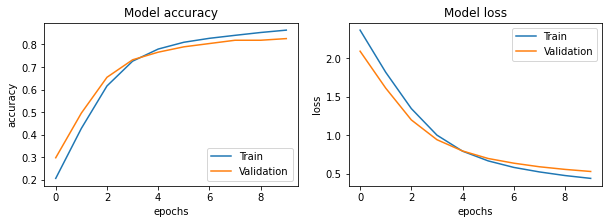

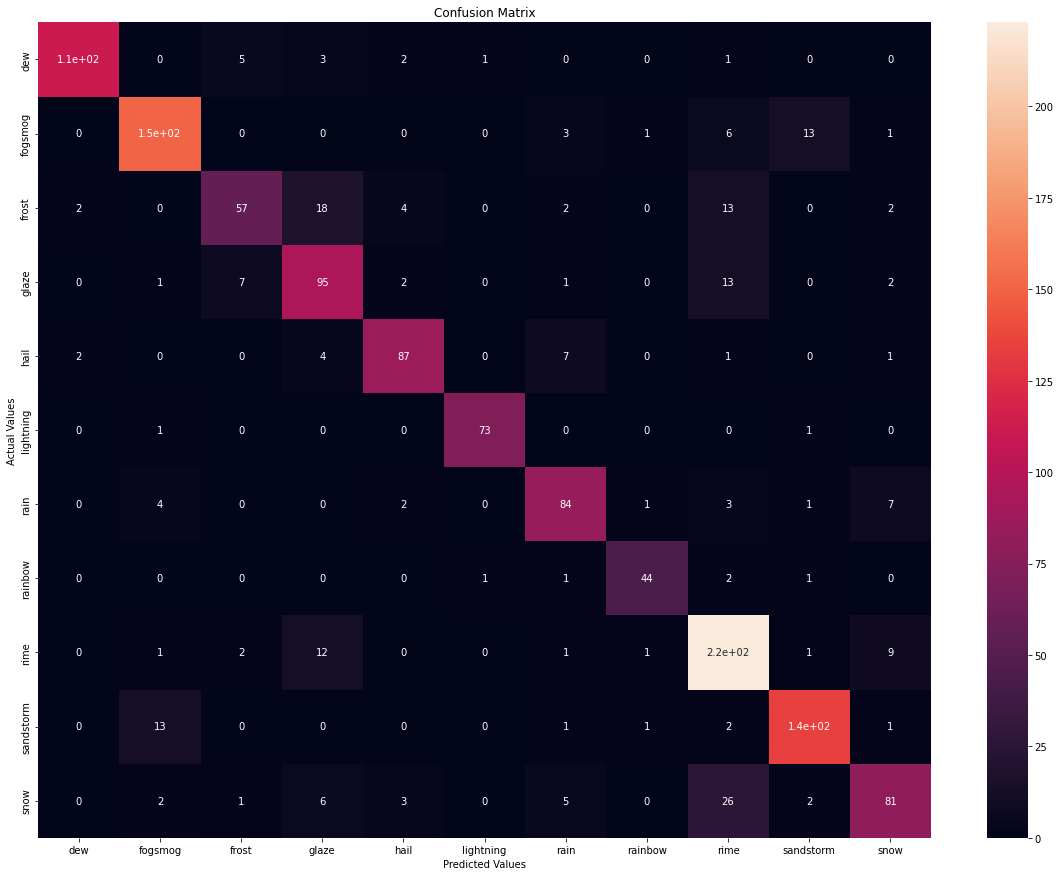

              precision    recall  f1-score   support

         dew       0.97      0.90      0.93       123
     fogsmog       0.87      0.86      0.87       174
       frost       0.79      0.58      0.67        98
       glaze       0.69      0.79      0.73       121
        hail       0.87      0.85      0.86       102
   lightning       0.97      0.97      0.97        75
        rain       0.80      0.82      0.81       102
     rainbow       0.92      0.90      0.91        49
        rime       0.77      0.89      0.83       250
   sandstorm       0.88      0.88      0.88       153
        snow       0.78      0.64      0.70       126

    accuracy                           0.83      1373
   macro avg       0.85      0.83      0.83      1373
weighted avg       0.83      0.83      0.83      1373



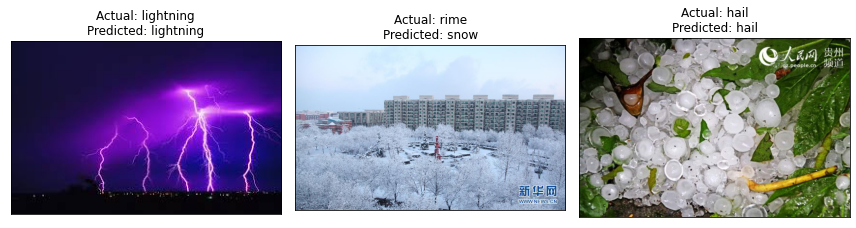

22/22 [==============================] - 28s 1s/step - loss: 0.5106 - accuracy: 0.8303
    Test Loss: 0.51056
Test Accuracy: 83.03%


In [15]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
MobileNet_pre_input=preprocess_input
train_gen_MobileNet, valid_gen_MobileNet, test_gen_MobileNet = fp.augment(MobileNet_pre_input,train_it,test_it)
MobileNet_model, stop_early=fp.run_model(MobileNet)
history = MobileNet_model.fit(
    train_gen_MobileNet,
    validation_data=valid_gen_MobileNet,
    epochs=10,
    callbacks=stop_early,
    verbose=1
)
history_MobileNet = fp.ploting(history,test_gen_MobileNet,train_gen_MobileNet, MobileNet_model,testLabels,testFilePath)

result_MobileNet = fp.result_test(test_gen_MobileNet,MobileNet_model)

In [10]:
MobileNet_model.save('model_MobileNet_1.h5')

# 3] VGG16

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg_pre_input=preprocess_input
train_gen_VGG, valid_gen_VGG, test_gen_VGG = fp.augment(vgg_pre_input,train_it,test_it)
model_VGG16, stop_early=fp.run_model(VGG16)
history = model_VGG16.fit(
    train_gen_VGG,
    validation_data=valid_gen_VGG,
    epochs=10,
    callbacks=stop_early,
    verbose=1
)


Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 661s 10s/step - loss: 4.1621 - accuracy: 0.1186 - val_loss: 3.0570 - val_accuracy: 0.1841
Epoch 2/10
69/69 [==============================] - 657s 10s/step - loss: 2.5905 - accuracy: 0.2555 - val_loss: 2.1739 - val_accuracy: 0.3181
Epoch 3/10
69/69 [==============================] - 636s 9s/step - loss: 1.9473 - accuracy: 0.3862 - val_loss: 1.7420 - val_accuracy: 0.4558
Epoch 4/10
69/69 [==============================] - 638s 9s/step - loss: 1.5967 - accuracy: 0.4968 - val_loss: 1.4785 - val_accuracy: 0.5269
Epoch 5/10
69/69 [==============================] - 661s 10s/step - loss: 1.3588 - accuracy: 0.5754 - val_loss: 1.2944 - val_accuracy: 0.5916
Epoch 6/10
69/69 [==============================] - 673s 10s/step - loss: 1.1847 - accuracy: 0.6307 - val_

In [7]:
model_VGG16.save('model_VGG16_1.h5')

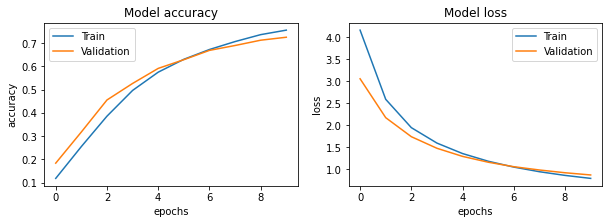

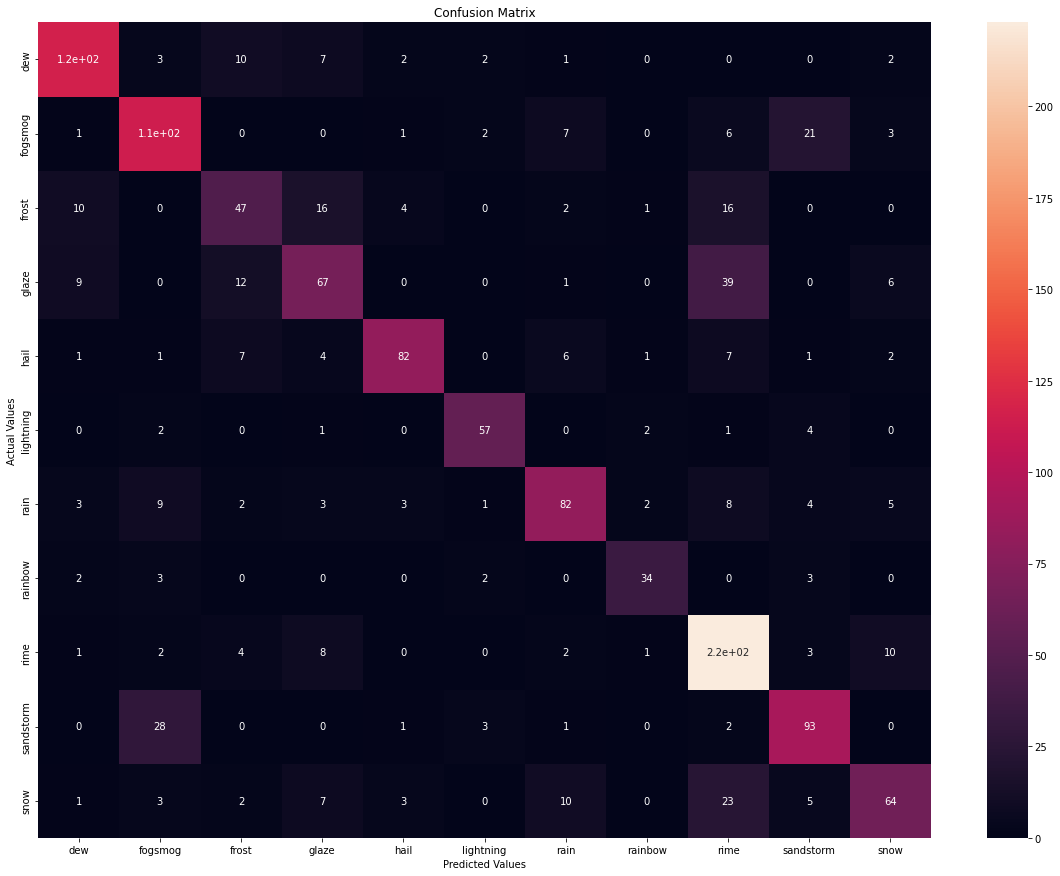

              precision    recall  f1-score   support

         dew       0.81      0.81      0.81       143
     fogsmog       0.69      0.74      0.71       155
       frost       0.56      0.49      0.52        96
       glaze       0.59      0.50      0.54       134
        hail       0.85      0.73      0.79       112
   lightning       0.85      0.85      0.85        67
        rain       0.73      0.67      0.70       122
     rainbow       0.83      0.77      0.80        44
        rime       0.69      0.88      0.77       254
   sandstorm       0.69      0.73      0.71       128
        snow       0.70      0.54      0.61       118

    accuracy                           0.71      1373
   macro avg       0.73      0.70      0.71      1373
weighted avg       0.71      0.71      0.71      1373



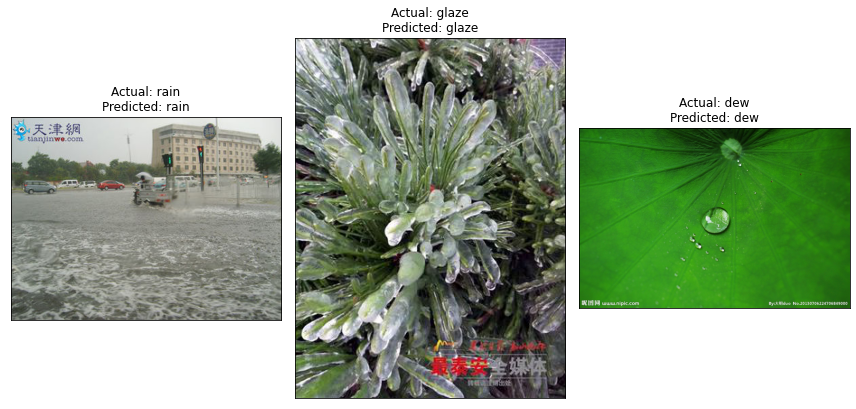

22/22 [==============================] - 146s 7s/step - loss: 0.9019 - accuracy: 0.7130
    Test Loss: 0.90195
Test Accuracy: 71.30%


In [8]:
history=fp.ploting(history,test_gen_VGG,train_gen_VGG, model_VGG16,testLabels,testFilePath)
result_VGG16 = fp.result_test(test_gen_VGG,model_VGG16)

# 4] DenseNet201

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/8
69/69 [==============================] - 665s 10s/step - loss: 2.1944 - accuracy: 0.2561 - val_loss: 1.9518 - val_accuracy: 0.3829
Epoch 2/8
69/69 [==============================] - 667s 10s/step - loss: 1.6758 - accuracy: 0.5203 - val_loss: 1.4601 - val_accuracy: 0.5925
Epoch 3/8
69/69 [==============================] - 668s 10s/step - loss: 1.2293 - accuracy: 0.6617 - val_loss: 1.1000 - val_accuracy: 0.6864
Epoch 4/8
69/69 [==============================] - 662s 10s/step - loss: 0.9274 - accuracy: 0.7477 - val_loss: 0.8667 - val_accuracy: 0.7539
Epoch 5/8
69/69 [==============================] - 666s 10s/step - loss: 0.7407 - accuracy: 0.7990 - val_loss: 0.7354 - val_accuracy: 0.7812
Epoch 6/8
69/69 [==============================] - 663s 10s/step - loss: 0.6237 - accuracy: 0.8267 - val_loss

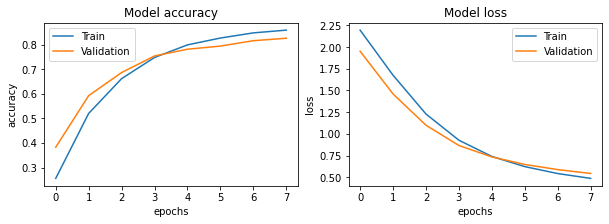

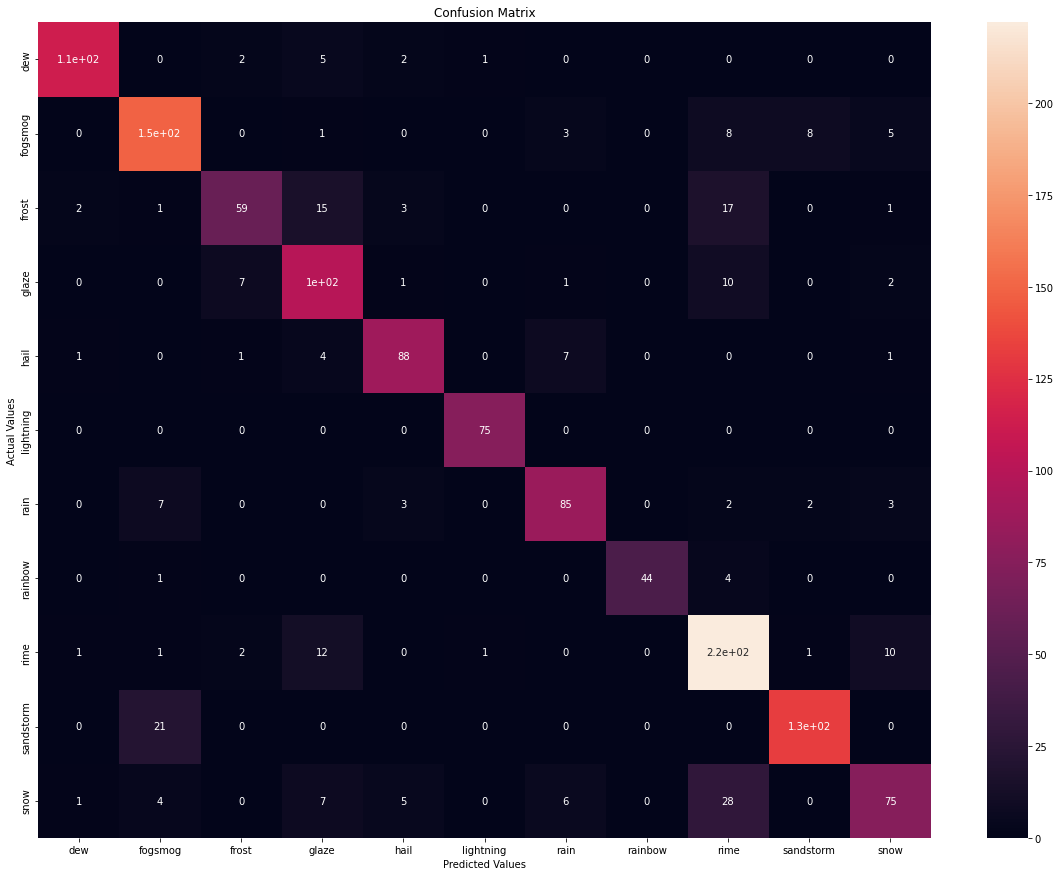

              precision    recall  f1-score   support

         dew       0.96      0.92      0.94       123
     fogsmog       0.81      0.86      0.83       174
       frost       0.83      0.60      0.70        98
       glaze       0.69      0.83      0.75       121
        hail       0.86      0.86      0.86       102
   lightning       0.97      1.00      0.99        75
        rain       0.83      0.83      0.83       102
     rainbow       1.00      0.90      0.95        49
        rime       0.76      0.89      0.82       250
   sandstorm       0.92      0.86      0.89       153
        snow       0.77      0.60      0.67       126

    accuracy                           0.83      1373
   macro avg       0.86      0.83      0.84      1373
weighted avg       0.84      0.83      0.83      1373



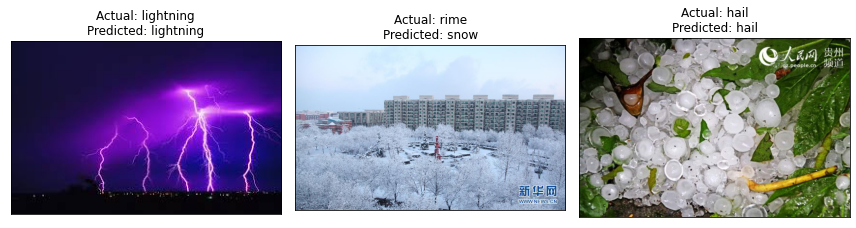

22/22 [==============================] - 172s 8s/step - loss: 0.5299 - accuracy: 0.8318
    Test Loss: 0.52992
Test Accuracy: 83.18%


In [12]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input

DenseNet201_pre_input=preprocess_input
train_gen_DenseNet201, valid_gen_DenseNet201, test_gen_DenseNet201 = fp.augment(DenseNet201_pre_input,train_it,test_it)
model_DenseNet201, stop_early=fp.run_model(DenseNet201)
history = model_DenseNet201.fit(
    train_gen_DenseNet201,
    validation_data=valid_gen_DenseNet201,
    epochs=8,
    callbacks=stop_early,
    verbose=1
)
history=fp.ploting(history,test_gen_DenseNet201,train_gen_DenseNet201, model_DenseNet201,testLabels,testFilePath)
result_DenseNet201 = fp.result_test(test_gen_DenseNet201,model_DenseNet201)

In [23]:
model_DenseNet201.save('model_DenseNet201.h5')

#  Model Comparison

# Compairison Based on Loss

In [16]:
output = pd.DataFrame({'Model':['MobileNet','ResNet50','VGG16','DenseNet201'],
                      'loss':[result_MobileNet[0],result_ResNet[0],result_VGG16[0],
                                 result_DenseNet201[0]]})

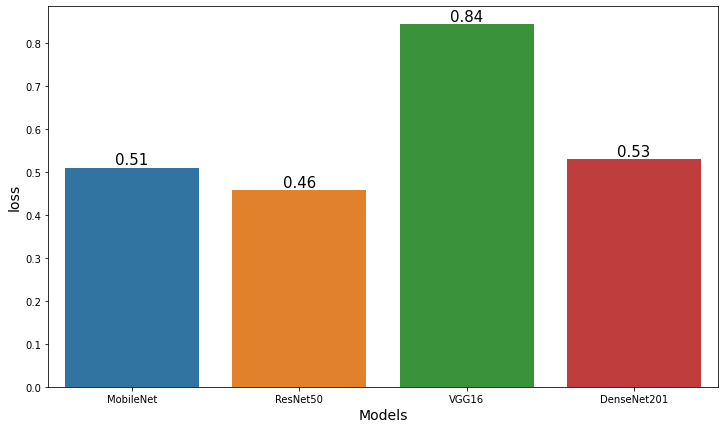

In [17]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='loss', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("loss", size=14)
plt.show()

# Compairison Based on Accuraccy

In [18]:
output = pd.DataFrame({'Model':['MobileNet','ResNet50','VGG16','DenseNet201'],
                      'Accuracy':[result_MobileNet[1],result_ResNet[1],result_VGG16[1],
                                 result_DenseNet201[1]]})

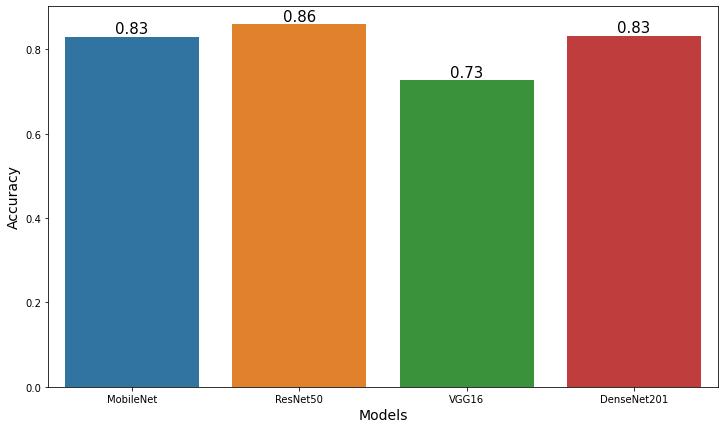

In [19]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.show()